In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
wines = pd.read_csv('wine.csv')
wines

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [18]:
wines.Wine.unique()

array([1, 2, 3])

In [19]:
wines.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [20]:
wines.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [21]:
def prep_wine_data(data):
    """
    Prepares wines data frame for machine learning models.
    
    Parameters
    ----------
    data : pandas.DataFrame to be prepared
    
    Return
    ----------
    (X, y) : pandas.DataFrame without Wine column, pandas.Series of Wine column
    """
    
    #Copy data frame
    df = data.copy()
    
    #Create X, where X is the data frame without the Wine column
    #X serves as the predictor variables
    X = df.drop(["Wine"], axis = 1)
    
    #Create y, where y just contains the Wine column
    #y serves as the target variable
    y = df["Wine"]
    return X,y

In [22]:
from sklearn.model_selection import train_test_split

# Split wines data into training data and testing data with a 70%/30% ratio, respectively
train, test = train_test_split(wines, test_size = 0.3)

# Create predictor variables and target variable from training data using data preparation function
X_train, y_train = prep_wine_data(train)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def check_column_scores(cols):
    """
    Trains and evaluates Logistic Regression via crossvalidation on the columns
    of the dataset with select indeces
    
    Parameters
    ----------
    cols : list of strings, columns on which to be trained
    
    Return
    ----------
    float : average of 5 cross validation scores
    """
    
    #Logistic Regression Model
    LR = LogisticRegression(max_iter = 5000)
    
    return cross_val_score(LR, X_train[cols], y_train, cv = 5).mean()

In [24]:
import itertools
features = []
for col in wines.columns:
    features.append(col)
features.remove('Wine')

combos = [[feature1]+[feature2] for feature1 in features for feature2 in features if feature1 != feature2]

print(len(combos))

156


In [25]:
# Create empty list to store cross validation scores
cv_scores = []
# Set the best cross validation score to be negative infinity
best_cv_score = -np.inf
# Create dictionary where keys are the combos and values are the cv scores
my_dict = {}

#Loop through every column combination
for combo in combos:
    # Apply check_column_scores function on combo
    score = check_column_scores(combo)
    # Add the key:value pair to my_dict
    my_dict[str(combo)] = score
    # Add the score to cv_scores
    cv_scores.append(score)
    
    # If the most recent score is better than best_cv_score,
    # reassign best_cv_score and assign combo to best_combo
    if cv_scores[-1] > best_cv_score:
        best_cv_score = cv_scores[-1]
        best_combo = combo

# Print the best column combination and its cross validation score
print("Best combo: " + str(best_combo))
print("which produces CV score: " + str(best_cv_score) + '\n')

# Sort my_dict in descending order by value
sorted_dict = dict(sorted(my_dict.items(), key = lambda item: item[1], reverse=True))

# Print out key:value pairs in sorted dictionary
for key, value in sorted_dict.items():
    print(key, ' : ', value)

Best combo: ['Flavanoids', 'Proline']
which produces CV score: 0.9196666666666665

['Flavanoids', 'Proline']  :  0.9196666666666665
['Proline', 'Flavanoids']  :  0.9196666666666665
['Alcohol', 'Flavanoids']  :  0.9116666666666667
['Flavanoids', 'Alcohol']  :  0.9116666666666667
['Color.int', 'Proline']  :  0.9036666666666667
['Proline', 'Color.int']  :  0.9036666666666667
['Color.int', 'OD']  :  0.8953333333333333
['OD', 'Color.int']  :  0.8953333333333333
['Alcohol', 'OD']  :  0.8713333333333333
['OD', 'Alcohol']  :  0.8713333333333333
['OD', 'Proline']  :  0.8713333333333333
['Proline', 'OD']  :  0.8713333333333333
['Phenols', 'Color.int']  :  0.8633333333333333
['Flavanoids', 'Color.int']  :  0.8633333333333333
['Color.int', 'Phenols']  :  0.8633333333333333
['Color.int', 'Flavanoids']  :  0.8633333333333333
['Hue', 'Proline']  :  0.8626666666666667
['Proline', 'Hue']  :  0.8626666666666667
['Proanth', 'Color.int']  :  0.8473333333333333
['Color.int', 'Proanth']  :  0.84733333333333

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Alcohol and Flavanoids')

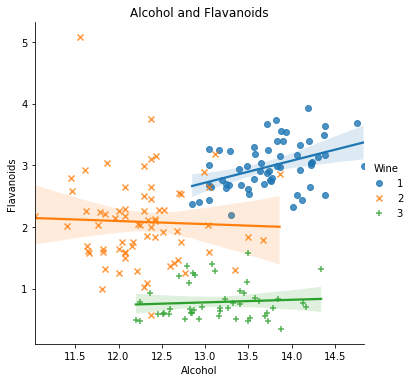

In [26]:
sns.lmplot('Alcohol', 'Flavanoids',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('Alcohol and Flavanoids')

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Proline and Flavanoids')

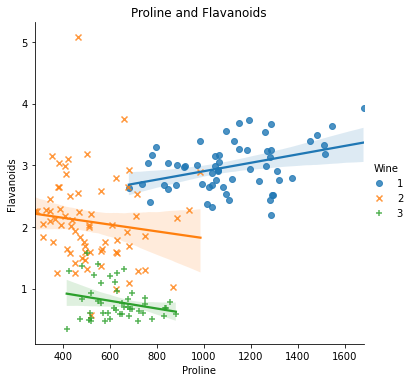

In [27]:
sns.lmplot('Proline', 'Flavanoids',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('Proline and Flavanoids')

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Proline and OD')

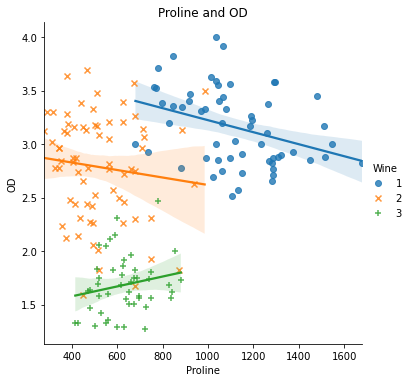

In [28]:
sns.lmplot('Proline', 'OD',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('Proline and OD')

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Flavanoids and Color.int')

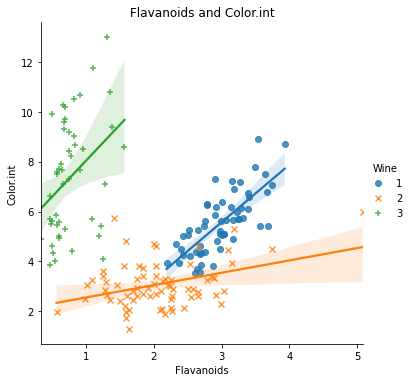

In [29]:
sns.lmplot('Flavanoids', 'Color.int',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('Flavanoids and Color.int')

/Users/theodorenguyen/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'OD and Color.int')

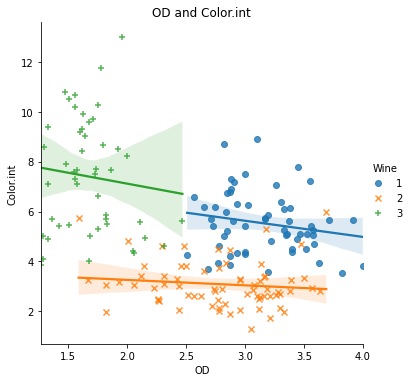

In [30]:
sns.lmplot('OD', 'Color.int',
    data = wines, fit_reg = True,
    markers = ["o", "x", "+"],
    hue = "Wine")
plt.title('OD and Color.int')